In [1]:
from sklearn.svm import SVR #svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive #구글 드라이브 연결
from pandas_datareader import data as pdr

In [2]:
filename = '/content/drive/MyDrive/Given Data_10/08.xlsx' #파일 읽어오기
df = pd.read_excel(filename, engine='openpyxl')
print(df)

          Date    Open    High     Low   Close      Adj Close   Volume
0   2020-01-02  236000  240000  234500  236000  204594.343750   213578
1   2020-01-03  237500  242000  236500  237000  205461.296875   273831
2   2020-01-06  234000  234500  230000  231000  200259.718750   217886
3   2020-01-07  231500  234500  231000  232000  201126.640625   138750
4   2020-01-08  229000  229500  226500  228000  197658.984375   340244
..         ...     ...     ...     ...     ...            ...      ...
938 2023-10-24  455000  483000  441500  474000  474000.000000  1529774
939 2023-10-25  476500  476500  443000  445500  445500.000000  1237237
940 2023-10-26  424500  435000  419000  421500  421500.000000  1676774
941 2023-10-27  423000  435000  415500  423000  423000.000000  1199624
942 2023-10-30  417500  433000  416500  433000  433000.000000   743725

[943 rows x 7 columns]


In [3]:
fin = df.tail(200) #데이터 전체
stock_close = fin[['Adj Close', 'Open']].mean(axis=1)
stock_close = stock_close.values

In [4]:
days = [] #임의로 데이터당 숫자 지정
for i in range(len(fin)):
  days.append([int(i)])
  i=i+1

In [5]:
# 가중치 설정을 위한 배열 생성
weights = np.ones(len(stock_close))
weights[:800] = 0.7

In [6]:
lin_svr = SVR(kernel='linear', C=7000) #커널을 linear로 설정
lin_svr.fit(days,stock_close,sample_weight=weights)

poly_svr = SVR(kernel='poly', C=7000, degree=5, coef0=1.0) #커널을 poly로 설정
poly_svr.fit(days,stock_close,sample_weight=weights)

rbf_svr = SVR(kernel='rbf',C=70000,gamma=0.2) #커널을 rbf로 설정
rbf_svr.fit(days,stock_close,sample_weight=weights)

SVR(C=70000, gamma=0.2)

In [7]:
day = np.array([[len(fin) + 1]])  # 다음 날을 예측하기 위해 적절한 방법으로 설정합니다.

lin_predictions = lin_svr.predict(day)
poly_predictions = poly_svr.predict(day)
rbf_predictions = rbf_svr.predict(day)

print('다음 날 예측 (linear): ', lin_predictions)
print('다음 날 예측 (polynomial): ', poly_predictions)
print('다음 날 예측 (RBF): ', rbf_predictions)
result = (int)(lin_predictions+poly_predictions+rbf_predictions)//3
result

다음 날 예측 (linear):  [545218.76056323]
다음 날 예측 (polynomial):  [376018.23947384]
다음 날 예측 (RBF):  [426565.96433967]


449267

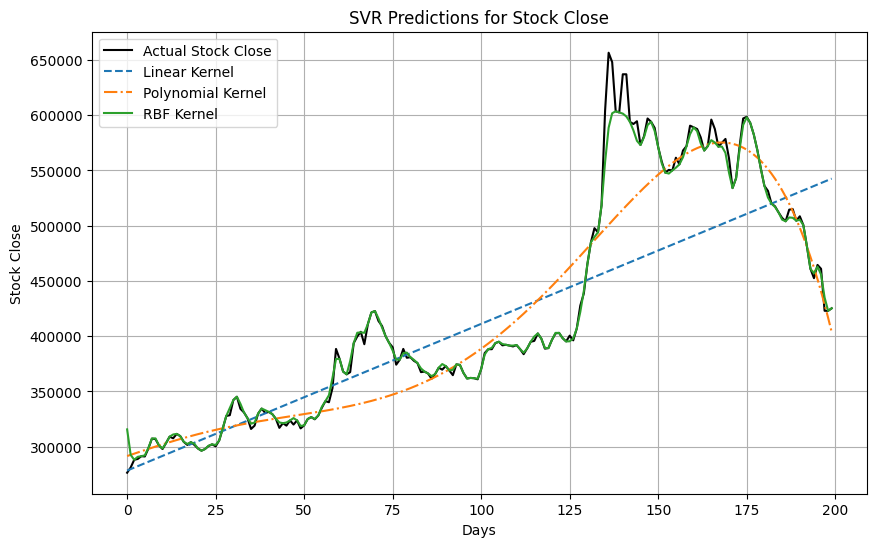

In [8]:
new_days = np.arange(len(fin))

# 예측값의 길이를 new_days와 동일하도록 조정
lin_predictions = lin_svr.predict(np.array(new_days).reshape(-1, 1))
poly_predictions = poly_svr.predict(np.array(new_days).reshape(-1, 1))
rbf_predictions = rbf_svr.predict(np.array(new_days).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(days, stock_close, label='Actual Stock Close', color='black')

plt.plot(new_days, lin_predictions, label='Linear Kernel', linestyle='--')
plt.plot(new_days, poly_predictions, label='Polynomial Kernel', linestyle='-.')
plt.plot(new_days, rbf_predictions, label='RBF Kernel', linestyle='-')

plt.xlabel('Days')
plt.ylabel('Stock Close')
plt.title('SVR Predictions for Stock Close')
plt.legend()
plt.grid(True)
plt.show()